In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Из кераса взята функция подгрузки изображений т.к. она удобная

In [2]:
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
from sklearn.cluster import KMeans

### Кластеризируем пиксели изображения по цветам (3 признака: (R, G, B) все от 0 до 255)

In [4]:
def Image_Clustering(img, n_clusters):
    X = image.img_to_array(img)
    X = X.reshape(X.shape[0]*X.shape[1],X.shape[2])
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    result = np.array(kmeans.labels_).reshape(377, 670)
    plt.figure(figsize = (10,10))
    plt.imshow(result, interpolation = 'nearest')
    plt.title('Количество кластеров:'+str(n_clusters))
    plt.show()
    return result

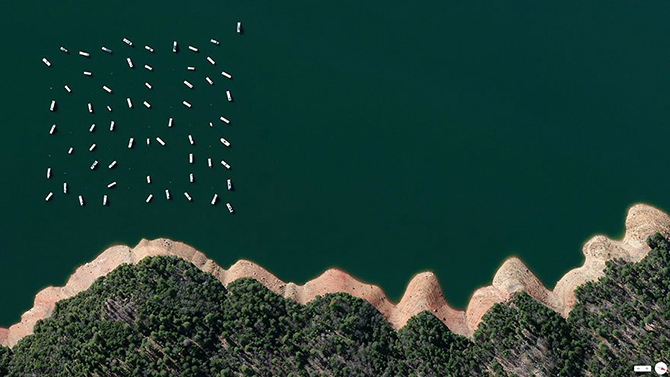

In [5]:
img = image.load_img('kartinka.jpg', target_size=(377, 670))
img

#### Водохранилище Нью-Буллардс-Бар, Калифорния, США

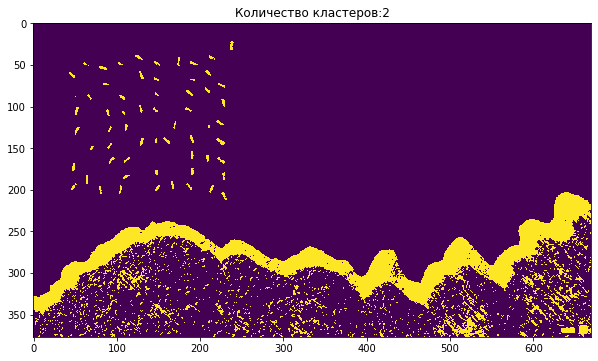

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
Image_Clustering(img, 2)

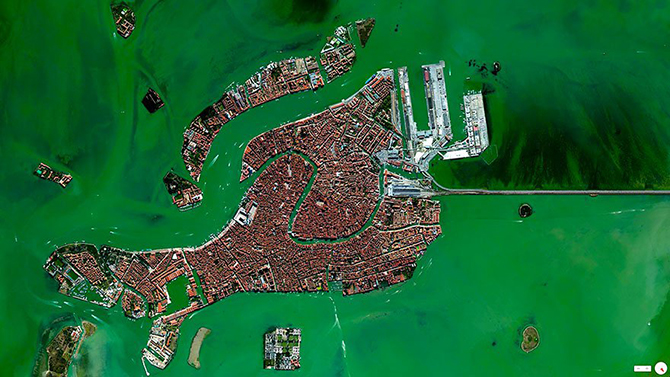

In [7]:
img = image.load_img('kartinka3.jpg', target_size=(377, 670))
img

### Венеция

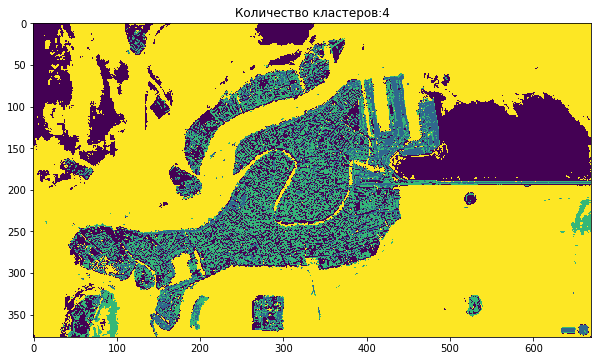

array([[0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       ...,
       [0, 3, 3, ..., 3, 3, 3],
       [0, 0, 3, ..., 3, 3, 3],
       [0, 0, 3, ..., 3, 3, 0]])

In [8]:
Image_Clustering(img, 4)

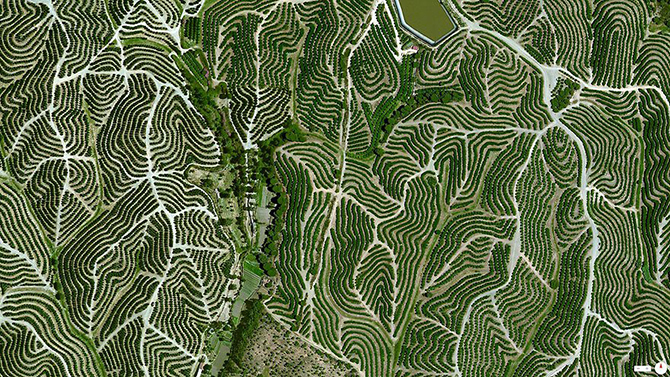

In [9]:
img = image.load_img('kartinka4.jpg', target_size=(377, 670))
img

### Виноградники, Уэльва, Испания

[[193. 193. 133.]
 [184. 181. 130.]
 [169. 162. 143.]
 ...
 [  1.  32.   0.]
 [102. 115.  85.]
 [156. 145. 139.]]


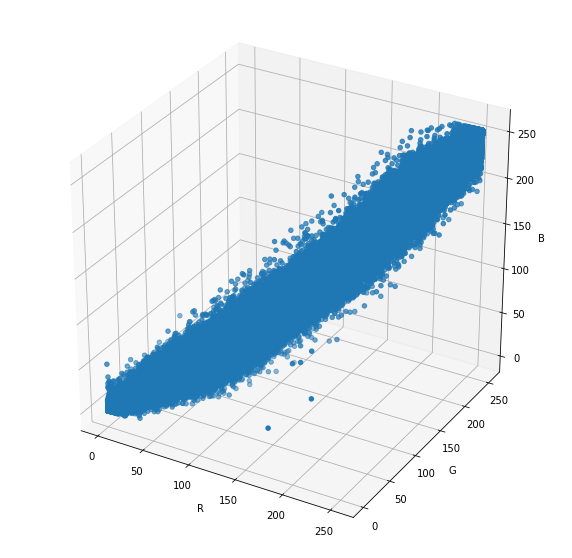

In [10]:
from mpl_toolkits.mplot3d import Axes3D
X = image.img_to_array(img)
X = X.reshape(X.shape[0]*X.shape[1],X.shape[2])
print(X)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

#### Распределение пикселей в пространстве параметров

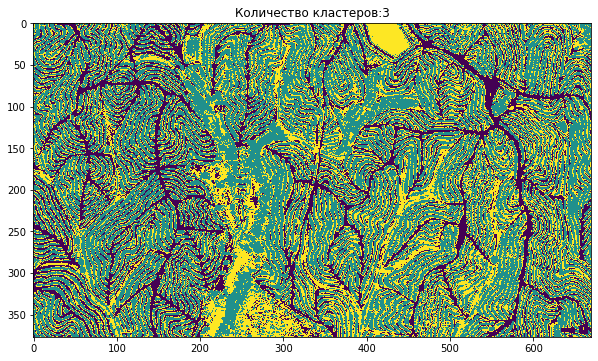

In [11]:
result = Image_Clustering(img, 3)
result = result+1

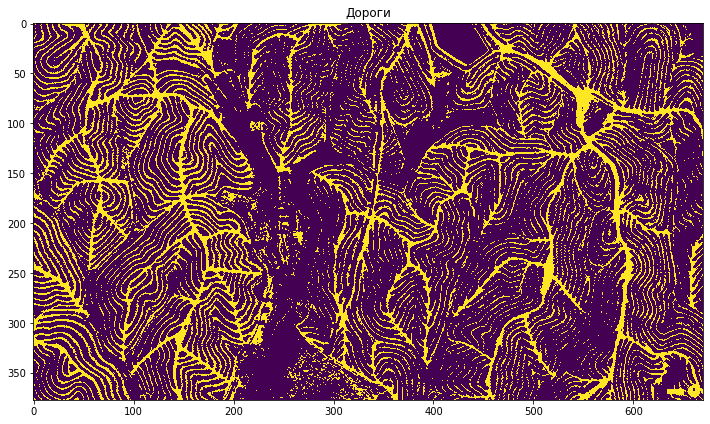

In [12]:
result2 = np.where([(result == 2)| (result == 3)],0,result).reshape(377,670)
plt.figure(figsize = (12,12))
plt.imshow(result2, interpolation = 'nearest')
plt.title('Дороги')
plt.show()

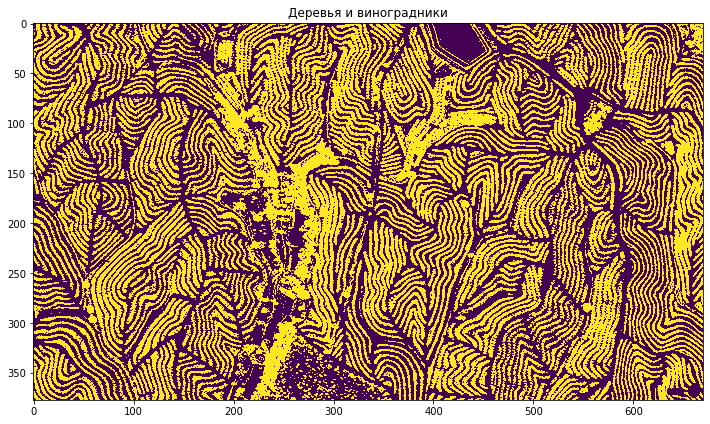

In [13]:
result2 = np.where([(result == 1)| (result == 3)],0,result).reshape(377,670)
plt.figure(figsize = (12,12))
plt.imshow(result2, interpolation = 'nearest')
plt.title('Деревья и виноградники')
plt.show()

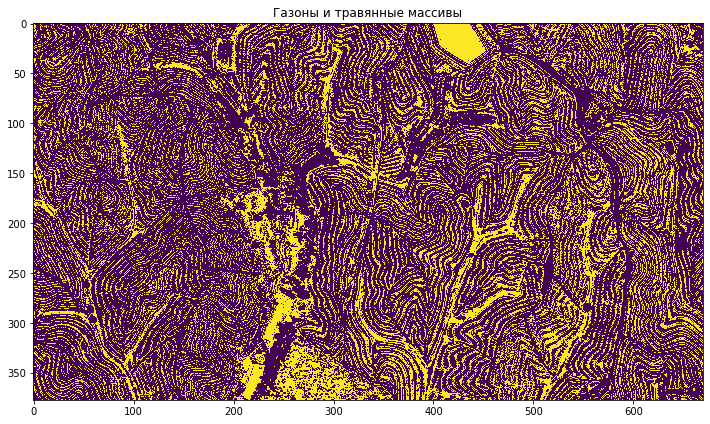

In [14]:
result2 = np.where([(result == 1)| (result == 2)],0,result).reshape(377,670)
plt.figure(figsize = (12,12))
plt.imshow(result2, interpolation = 'nearest')
plt.title('Газоны и травянные массивы')
plt.show()

In [15]:
from sklearn.metrics import silhouette_samples
result.reshape(252590,)

array([1, 1, 1, ..., 2, 3, 1])

In [16]:
silhouete = silhouette_samples(X,result.reshape(252590,))

In [18]:
silhouete.mean()

0.5575871

In [28]:
X1 = X[result.reshape(result.shape[0]*result.shape[1]) == 1]
X2 = X[result.reshape(result.shape[0]*result.shape[1]) == 2]
X3 = X[result.reshape(result.shape[0]*result.shape[1]) == 3]

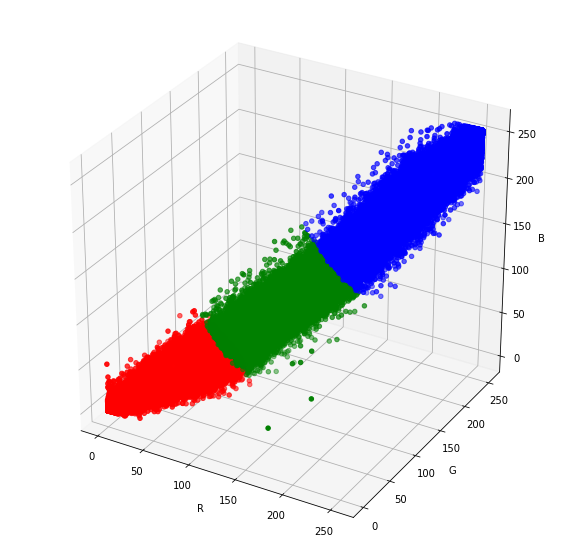

In [35]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:,0], X1[:,1], X1[:,2], color ='b')
ax.scatter(X2[:,0], X2[:,1], X2[:,2], color ='r')
ax.scatter(X3[:,0], X3[:,1], X3[:,2], color ='g')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()